# Titanic: Machine Learning from Disaster
A competition in [Kaggle](https://www.kaggle.com/). To go to the competition page [click.](https://www.kaggle.com/c/titanic)

In this challenge, the aim is to complete the analysis of what sorts of people were likely to survive. In particular, you need to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt, sklearn, seaborn as sb
from sklearn.model_selection import train_test_split
import functions,plots

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
training_data= pd.read_csv('train.csv', header=0,dtype={'Age': np.float64})
test_data= pd.read_csv('test.csv',header=0,dtype={'Age': np.float64})

In [3]:
print("--------------------TRAINING DATASET---------------------------------")
print(training_data.info())
print("--------------------TEST DATASET---------------------------------")
print(test_data.info())

--------------------TRAINING DATASET---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
--------------------TEST DATASET---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null flo

In [4]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Pclass

------------Survival rates based on Pclass----------------
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


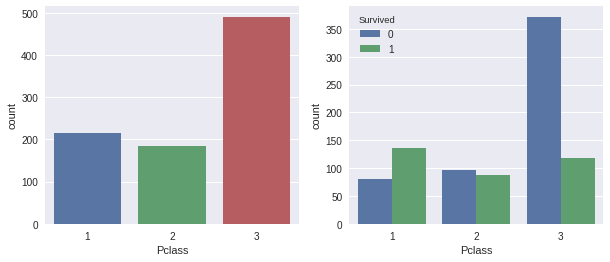

In [6]:
print("------------Survival rates based on Pclass----------------")
print (training_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.countplot(x='Pclass',data=training_data)

plt.subplot(1,2,2)
sb.countplot(x='Pclass',hue='Survived',data=training_data)

### Sex

------------Survival rates based on Sex----------------
      Sex  Survived
0  female  0.742038
1    male  0.188908


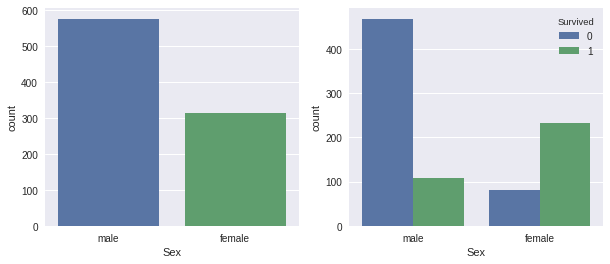

In [7]:
print("------------Survival rates based on Sex----------------")
print (training_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.countplot(x='Sex',data=training_data)

plt.subplot(1,2,2)
sb.countplot(x='Sex',hue='Survived',data=training_data)

### Age

------------Survival rates based on Age ranges----------------
       Ages Between  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.369942
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4      (64.084, 80]  0.090909


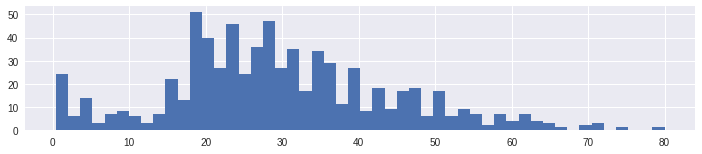

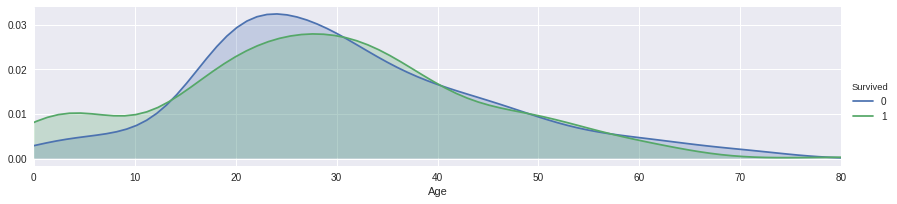

In [8]:
print("------------Survival rates based on Age ranges----------------")
training_data['Ages Between'] = pd.cut(training_data['Age'],5)
print (training_data[['Ages Between', 'Survived']].groupby(['Ages Between'], as_index=False).mean())
training_data=training_data.drop(['Ages Between'],axis=1)


plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
training_data['Age'].hist(bins=50)

rate = sb.FacetGrid(training_data, hue="Survived",aspect=4)
rate.map(sb.kdeplot,'Age',shade= True)
rate.set(xlim=(0, training_data['Age'].max()))
rate.add_legend()

### SibSp and Parch

------------Survival rates based on Family Size----------------
   Family Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


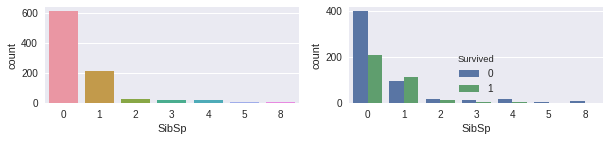

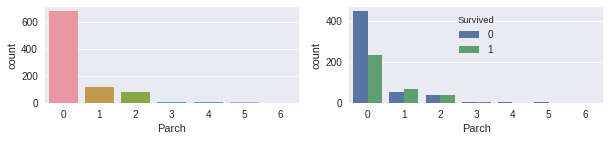

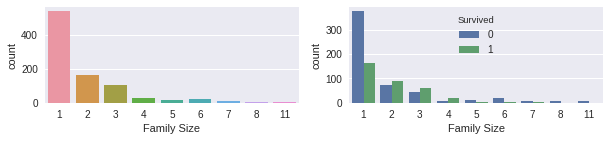

In [9]:
print("------------Survival rates based on Family Size----------------")
training_data['Family Size'] = training_data["Parch"] + training_data["SibSp"]+1
print (training_data[['Family Size', 'Survived']].groupby(['Family Size'], as_index=False).mean())


plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
sb.countplot(x='SibSp',data=training_data)

plt.subplot(3,2,2)
sb.countplot(x='SibSp',hue='Survived',data=training_data)

plt.figure(figsize=(10,6))
plt.subplot(3,2,3)
sb.countplot(x='Parch',data=training_data)

plt.subplot(3,2,4)
sb.countplot(x='Parch',hue='Survived',data=training_data)

plt.figure(figsize=(10,6))
plt.subplot(3,2,5)
sb.countplot(x='Family Size',data=training_data)

plt.subplot(3,2,6)
sb.countplot(x='Family Size',hue='Survived',data=training_data)



training_data=training_data.drop(['Family Size'],axis=1)

### Fare

-------------Survival rates based on Fare ranges----------------
    Fares Between  Survived
0       [0, 7.91]  0.197309
1  (7.91, 14.454]  0.303571
2    (14.454, 31]  0.454955
3   (31, 512.329]  0.581081


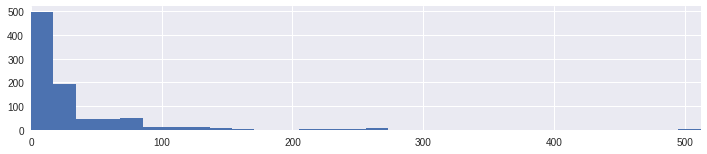

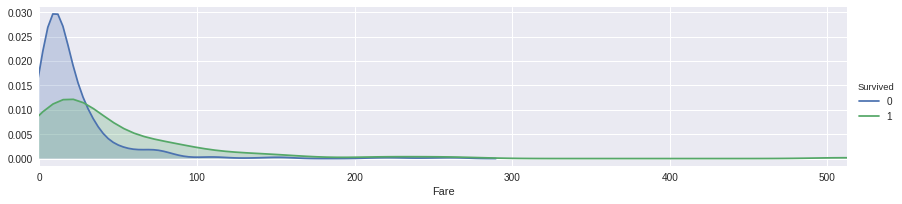

In [10]:
print("-------------Survival rates based on Fare ranges----------------")
training_data['Fares Between'] = pd.qcut(training_data['Fare'], 4)
print (training_data[['Fares Between', 'Survived']].groupby(['Fares Between'], as_index=False).mean())
training_data=training_data.drop(['Fares Between'],axis=1)


plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
plt.xlim((0,training_data['Fare'].max()))
training_data['Fare'].hist(bins=30)

rate = sb.FacetGrid(training_data, hue="Survived",aspect=4)
rate.map(sb.kdeplot,'Fare',shade= True)
rate.set(xlim=(0, training_data['Fare'].max()))
rate.add_legend()

### Embarked

------------Survival rates based on Embarked feature----------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


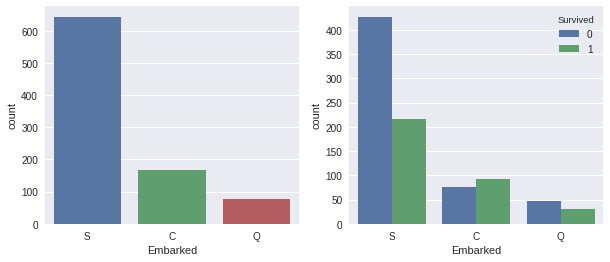

In [11]:
print("------------Survival rates based on Embarked feature----------------")
print (training_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.countplot(x='Embarked',data=training_data)

plt.subplot(1,2,2)
sb.countplot(x='Embarked',hue='Survived',data=training_data)

## DATA MUNGING

In [12]:
new_training_data=training_data.copy()
new_test_data=test_data.copy()

In [13]:
# ----------------- Filling missing values in Age column ------------------------#
new_training_data=functions.fill_age(new_training_data)
new_test_data=functions.fill_age(new_test_data)
            
# ----------------- Filling missing values in Embarked column------------------------#
new_training_data["Embarked"] = new_training_data["Embarked"].fillna('S')

# ----------------- Filling missing values in Fare column------------------------#
new_test_data["Fare"] = new_test_data["Fare"].fillna(new_test_data['Fare'].median())

new_training_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q


In [14]:
# ----------------- Family Size feature ------------------------#
new_training_data=functions.create_familysize(new_training_data)
new_training_data=functions.create_isalone(new_training_data)
new_training_data=functions.create_title(new_training_data)
new_training_data=functions.create_primacy(new_training_data)

new_test_data=functions.create_familysize(new_test_data)
new_test_data=functions.create_isalone(new_test_data)
new_test_data=functions.create_title(new_test_data)
new_test_data=functions.create_primacy(new_test_data)

new_training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Primacy
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr.,2.750000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs.,72.283300
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss.,2.975000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs.,54.100000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr.,3.016667


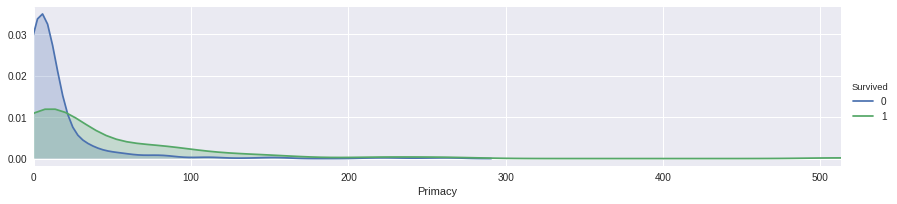

In [15]:
#Plotting survival rate graph based on Primacy feature
rate = sb.FacetGrid(new_training_data, hue="Survived",aspect=4)
rate.map(sb.kdeplot,'Primacy',shade= True)
rate.set(xlim=(0, new_training_data['Primacy'].max()))
rate.add_legend()

In [16]:
# Mapping
new_training_data=functions.mapping(new_training_data)
new_test_data=functions.mapping(new_test_data)

new_training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Primacy
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,2,0,1,2.750000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,2,0,3,72.283300
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,1,1,2,2.975000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,2,0,3,54.100000
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,1,1,3.016667


In [17]:
#Creating dummy values for Embarked feature
new_training_data=functions.dummy_embarked(new_training_data)
new_test_data=functions.dummy_embarked(new_test_data)

new_training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Title,Primacy,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,2,0,1,2.750000,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,2,0,3,72.283300,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,1,1,2,2.975000,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,2,0,3,54.100000,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,1,1,1,3.016667,1,0,0


In [18]:
#Dropping unused columns
new_training_data = functions.drop_columns(new_training_data)
new_test_data = functions.drop_columns(new_test_data)


In [19]:
new_training_data.head()

,Survived,Sex,Age,IsAlone,Title,Primacy,C,Q,S
0,0,1,1,0,1,2.750000,1,0,0
1,1,0,2,0,3,72.283300,0,1,0
2,1,0,1,1,2,2.975000,1,0,0
3,1,0,2,0,3,54.100000,1,0,0
4,0,1,2,1,1,3.016667,1,0,0


## CREATING A MODEL

In [20]:
# Splitting data set
train, test = train_test_split(new_training_data, test_size=0.2, random_state=4)

train_y = train['Survived']
train_x = train.drop('Survived', axis=1)
test_y = test['Survived']
test_x = test.drop('Survived', axis=1)

In [21]:
# Random Forest 
forest=RandomForestClassifier(n_estimators=100, max_depth=5,random_state=13)
forest.fit(train_x,train_y)
print("Training score: {:.4f}".format(forest.score(train_x,train_y)))
print("Test score: {:.4f}".format(forest.score(test_x,test_y)))

Training score: 0.8104
Test score: 0.8380


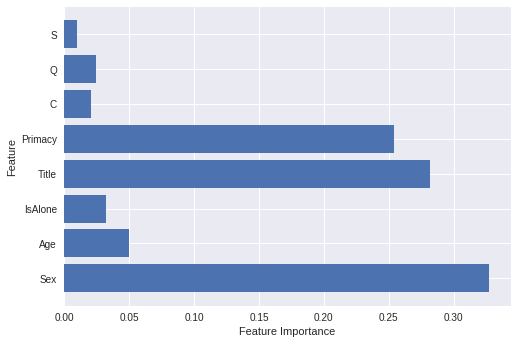

In [27]:
plots.plot_feature_importances(forest,train_x)

-------------------------- Confusion Matrix for Random Forest Model----------------------


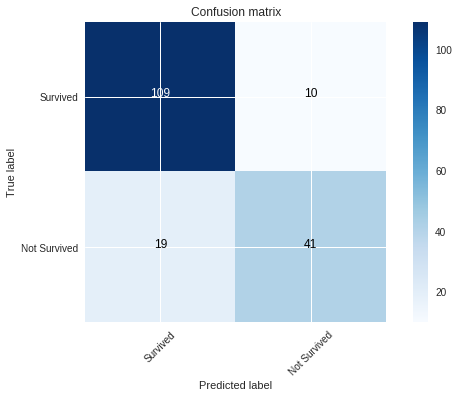

In [28]:
print("-------------------------- Confusion Matrix for Random Forest Model----------------------")
plots.plot_conf_mat(forest, test_x, test_y,['Survived', 'Not Survived'])

## SUBMISSION

In [25]:
preds=forest.predict(new_test_data)
submission = pd.DataFrame({
            "PassengerId":test_data["PassengerId"],
            "Survived": preds
        })
submission.to_csv("sonuclar.csv",index=False)